<p style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:40px 20px;"><b>Multiple Linear Regression</b></p>

# <font color='green'> <b>Importing Libraries</b><font color='black'>  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from summarytools import dfSummary
from ydata_profiling import ProfileReport

from scipy.stats import skew # for skewness
from sklearn.model_selection import train_test_split                              # for train-test split
from sklearn.linear_model import LinearRegression                                 # for LinearRegression model fitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score     # for error metrics
from yellowbrick.regressor import ResidualsPlot                                   # for residuals plot
from yellowbrick.regressor import PredictionError                                 # for another residuals plot

plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# y = b0 + b1X1 + b2X2 + b3X3    multiple linear regression

# <font color='green'> <b>Loading Dataset & EDA</b><font color='black'>  

In [6]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
# Calculating the skewness value of all features except the sales column
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


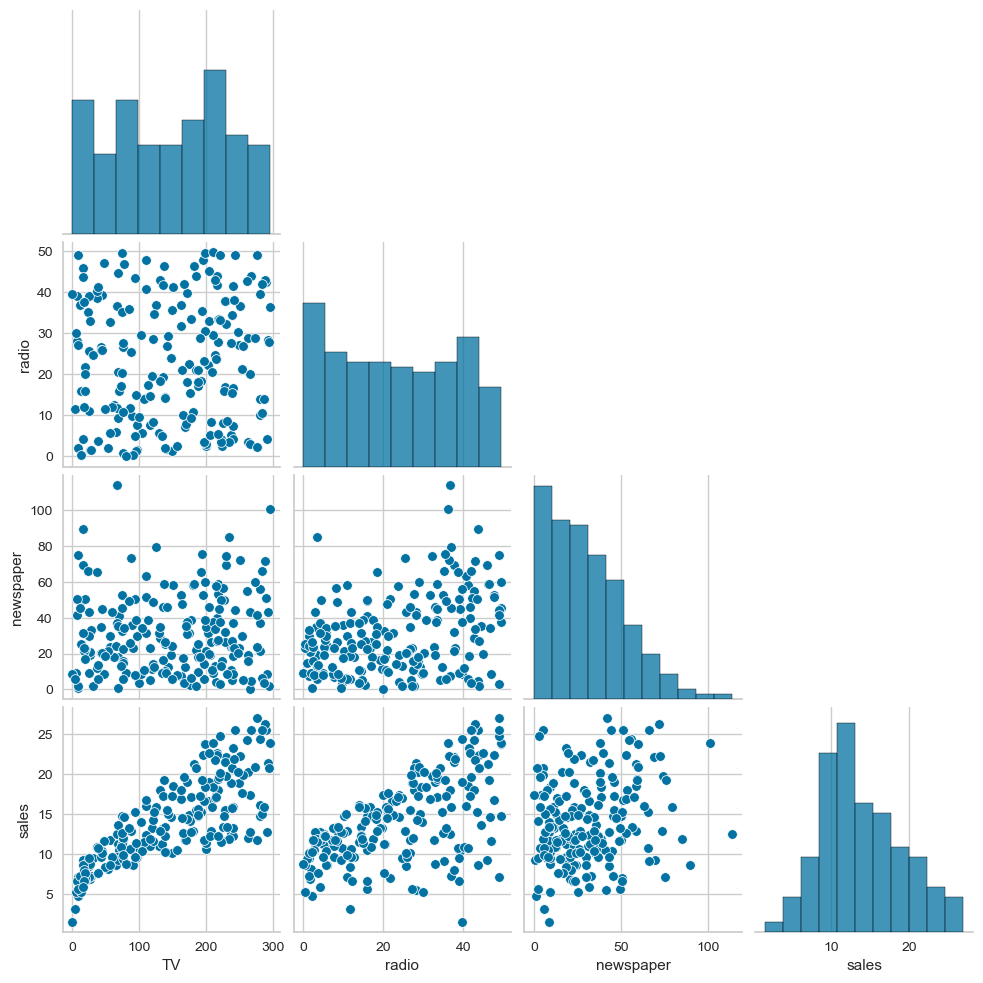

In [12]:
sns.pairplot(df, corner=True);

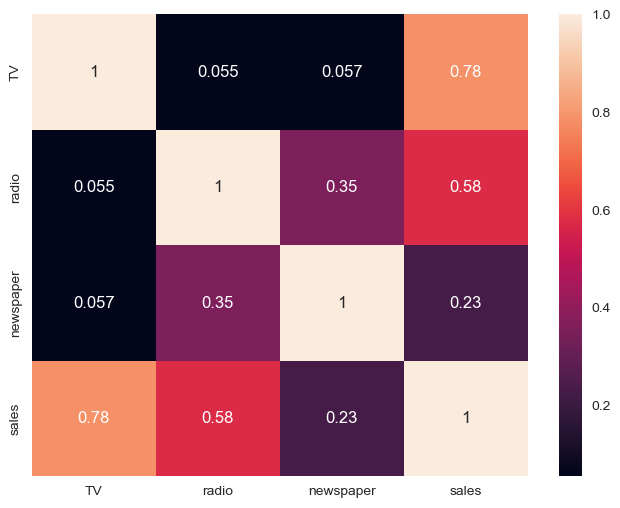

In [13]:
sns.heatmap(df.corr(), annot=True);

# <font color='green'> <b>Defining X and y variables</b><font color='black'>  

In [15]:
X = df.drop(columns= "sales") # The process of dropping the sales column (target variable) from the df and assigning the remaining columns to X
y = df["sales"]               # Assigning target variable

# <font color='green'> <b>Train-Test Split</b><font color='black'>  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)


 - **If Data < 1000:** It is divided into 30% Test - 70% Train or 20% Test - 80% Train.
 - **If Data < 100K:** It is divided into 10% Test - 90% Train or 20% Test - 80% Train.
 - **If 100K < Data < 1M:** 5% is divided into Test - 95% is divided into Train.
 - **If Data > 1M:** It is divided into 1% Test - 99% Train.

**Test percentage may be reduced as data volume increases.**

# <font color='green'> <b>Model Fitting</b><font color='black'>  

In [20]:
model = LinearRegression()

# We should always assign the algorithm to a variable. Otherwise, you may receive an error while in the prediction section.

In [21]:
model.fit(X_train, y_train)

LinearRegression()

# <font color='green'> <b>Prediction</b><font color='black'>  

In [23]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [24]:
model.coef_

# gives the coefficients of the model. That is, the coefficients of x1,x2,x3

array([0.04405928, 0.1992875 , 0.00688245])

In [25]:
model.feature_names_in_

# shows which features the above coefficients belong to respectively

array(['TV', 'radio', 'newspaper'], dtype=object)

In [26]:
model.intercept_

# returns the intercept value in the equation

2.70894909251591

**y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0**

 - b1:0.04
 - b2:0.199
 - b3:0.006
 -
 - b0: 2.71

# <font color='green'> <b>Error Metrics</b><font color='black'>  

In [29]:
# mae = mean_absolute_error(actual, pred)
# mse = mean_squared_error(actual, pred)
# rmse = np.sqrt(mean_squared_error(actual, pred))
# R2_score = r2_score(actual, pred)

In [30]:
# Test R^2 calculation (Expected to be close to one)
R2_score = r2_score(y_test, y_pred)

# MAE calculation (Expected to be close to zero)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error calculation (Expected to be close to zero)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error - RMSE calculation (It is desired to be close to zero.)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2_score \t: {R2_score}")
print(f"MAE \t\t: {mae}")
print(f"MSE \t\t: {mse}")
print(f"RMSE \t\t: {rmse}")

R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549084
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [31]:
# Average Error Rate
# It is the normalized version of errors such as RMSE. In this way, it is possible to compare different models with each other.

# We get the average value of the target variable.
sales_mean = df["sales"].mean()

# We find normalized MAE and RMSE values.
mae_norm = mae / sales_mean
rmse_norm = rmse / sales_mean

print(f"Normalized MAE \t\t: {mae_norm}")
print(f"Normalized RMSE \t: {rmse_norm}")

Normalized MAE 		: 0.10780311802138764
Normalized RMSE 	: 0.138957903679418


# <font color='green'> <b>Evaluation Model</b><font color='black'>  

In [33]:
# Code blog that calculates, writes and tabulates error metrics - 1
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [34]:
# Code blog that calculates, writes and tabulates error metrics - 2
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

**To compare the test values ​​with the train, we will also predict with the train values.**

In [36]:
# Predicting with train data
y_train_pred = model.predict(X_train)

In [37]:
mlr = train_val(y_train, y_train_pred, y_test, y_pred, "mlr")
mlr

,mlr_train,mlr_test
R2,0.905516,0.860947
mae,1.158150,1.511669
mse,2.479355,3.796797
rmse,1.574597,1.948537


**Train R2 and Test R2 are quite close to each other.** As a first impression, it can be said that there is no overfitting, but the final decision is made by looking at the following procedures.

# <font color='green'> <b>Residuals Plotting</b><font color='black'>  

In [40]:
residuals = y_test - y_pred

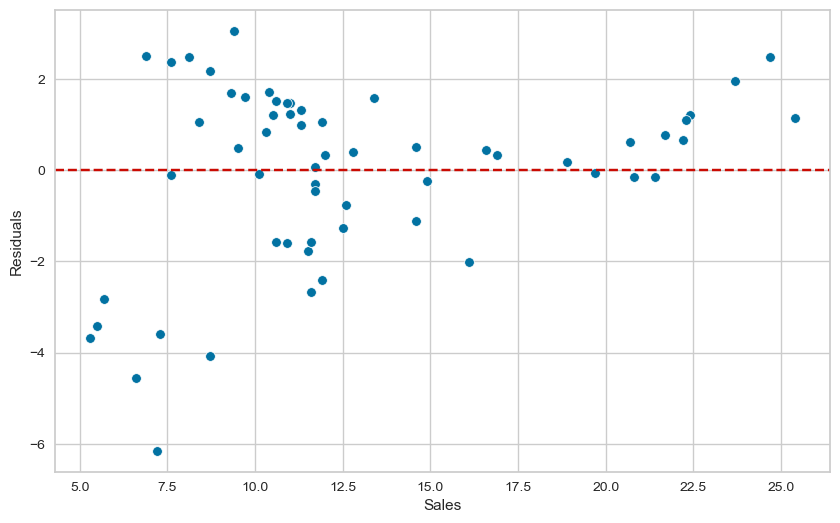

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("Sales")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

In the scatter plot above, **there is no pattern in the residuals.** This is also a desired thing.

In [43]:
skew(residuals)

-0.9865673346742742

Tabachnik and Fidel say that the range of +-1.5 for Skewness can be considered a normal distribution. Here too, the skewness for residuals was -0.98.

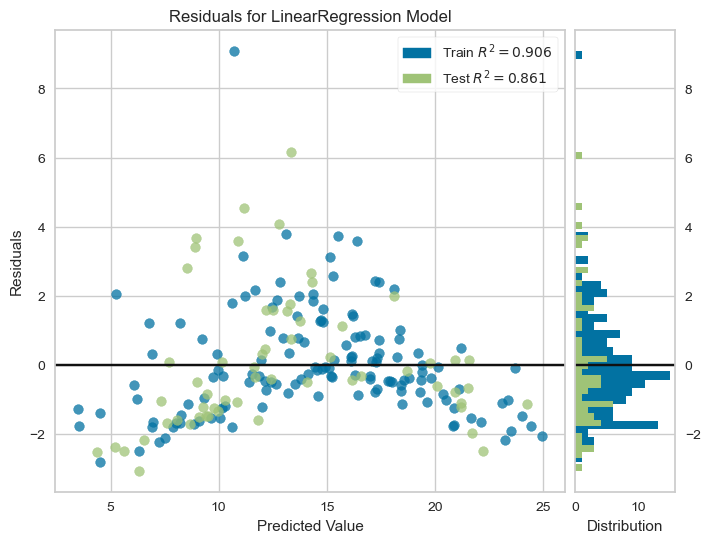

In [45]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)   # Fit the training data to the visualizer
visualizer.score(X_test, y_test)   # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

# <font color='green'> <b>Prediction Error</b><font color='black'>

2nd important step for overfitting control!

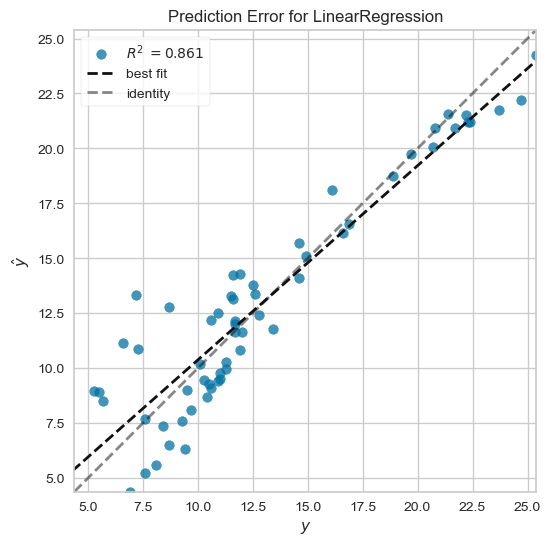

In [47]:
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

- Gray line -> Optimal line (identity).
- Black line -> Best fit line.

**We can say that the closer the best fit line is to the gray line, the better the model.**

# <font color='green'> <b>Final Model</b><font color='black'>  

In [50]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [51]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
final_model.intercept_

2.9388893694594067

In [53]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [54]:
# Model trial with a sample data entry

new_data = [[150,20,15]]

In [55]:
final_model.predict(new_data)

array([13.55862413])

For the values of:
- TV: 150
- radio: 20
- newspaper: 15

**The prediction of sales value is 13.55862413**